# Bone vibrator maximal hearing level output: comparison betweeen B81 and B71 (Jansson et al., 2015).

Guido Cattani, 11-01-2023

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_data(fin):
    # read input file, clean and mung data
    df = pd.read_csv(fin)
    df.set_index('Unnamed: 0', drop=True, inplace=True)
    df.index.names = ['Data_type']
    return df

In [4]:
def splitting_data(fin):
    # input max_otput data, 
    # output is df with f as index and as colums tuples (max_otput, sd) for B81 & B71
    df = read_data(fin)
    l = list()                                         # empty list
    st = pd.Series(dtype = 'float')                    # empty series
    df1 = pd.DataFrame()                               # empty dataframe
    for i in df.index:                                 # separate data lines
        s = df.loc[i]                                    
        l.append(s)                                    # make list of data lines 
    for j in range(0, len(l), 2):
        smo = l[j]                                     # series with ouput data
        ssd = l[j+1]                                   # series with sd data
        for f in smo.index:                            # freq. recursor
            t = (smo[f], ssd[f])                       # make a tuple with max output & sd
            st.at[f] = t                               # create a series of tuples
            st.name = smo.name                         # series name = name data line
        df1 = pd.concat([df1, st], axis = 1)           # all frequencies
    return df1

In [5]:
def make_distribution(fin):
    # this function create a long dataframe
    df = splitting_data(fin)
    df1 = pd.DataFrame()                               # empty dataframe
    col_names = list(df.columns)
    for vibrator_name in col_names:
        s = df[vibrator_name]                          # separate data rows
        l = list()                                     # empty list
        distributions = create_arrays(s)               # df with all freq. distributions
        for i in range(len(distributions)): l.append(vibrator_name)# add data/vibrator name
        svn = pd.Series(l, name = 'data_name')
        df2 = pd.concat([svn, distributions], axis = 1)
        df1 = pd.concat([df1, df2])                    # B81 & B71 together
    
    # from wide to long: unpivot data
    df1 = pd.melt(df1, id_vars = 'data_name', var_name='Frequency [Hz]', 
                        value_name='Maximal Hearing Level Output [dBHL]', 
                        col_level=None, ignore_index=True)
    return df1

In [6]:
def create_arrays(s):
    # function to create per frequency a distribution n=10000 with average and SD from data
    df = pd.DataFrame(dtype = 'float')
    for f in s.index: 
        avrg, st_dev = (s[f])
        distribution = np.random.normal(loc=avrg,scale=st_dev,size=10000)
        line = pd.Series(distribution, dtype = 'float', name = f)
        df = pd.concat([df, line], axis = 1)
    return df

In [7]:
def show_scatter(fin):
    df = make_distribution(fin) # plot input data
    
    # make a scatterplot
    sns.set_style("whitegrid")

    ax = sns.pointplot(data=df, x=df['Frequency [Hz]'], 
                       y=df['Maximal Hearing Level Output [dBHL]'], hue=df['data_name'], 
                       estimator='mean', errorbar='sd', dodge=0.2, join=True,
                       palette='colorblind') 

    plt.ylim(reversed(plt.ylim(0, 100))) # reverse y as
    ax.xaxis.set_ticks_position('top')   # place x axes on top
    ax.xaxis.set_label_position('top')   # place x label on top
    plt.grid(visible=True, which='major', axis='both') # add horizon. & vertical rasters

    # place legend outside plot top right corner
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.savefig("/media/guido/LACIE/Beengeleiding/b71_b81_max.png", 
                dpi=300, bbox_inches = "tight")

    plt.show()

In [8]:
def execution(fin = "/media/guido/LACIE/Beengeleiding/Max_output_Jansson_B81&B71.csv"):
    data = read_data(fin)
    show_scatter(fin)
    return data

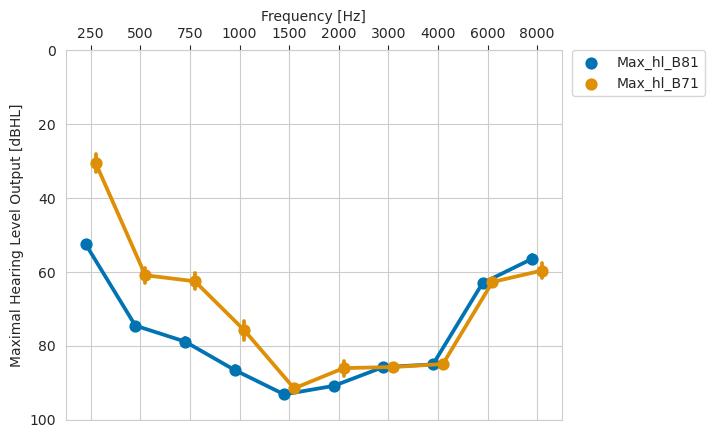

,250,500,750,1000,1500,2000,3000,4000,6000,8000
Data_type,,,,,,,,,,
Max_hl_B81,52.6,74.6,78.9,86.6,93.2,90.9,85.8,85.1,63.1,56.5
SD_max_hl_B81,0.8,0.4,0.9,1.1,0.7,0.3,0.2,0.3,0.6,1.0
Max_hl_B71,30.6,61.0,62.6,75.9,91.6,86.1,85.8,85.0,62.8,59.7
SD_max_hl_B71,2.5,2.0,2.2,2.6,1.0,2.0,0.6,0.5,0.7,2.0


In [9]:
execution()

Data are taken from:

Karl-Johan Fredén Jansson, Bo Håkansson, Leif Johannsen & Tomas Tengstrand (2015) 
Electro-acoustic performance of the new bone vibrator Radioear B81: 
A comparison with the conventional Radioear B71, 
International Journal of Audiology, 54:5, 334-340, 
DOI: 10.3109/14992027.2014.980521
